# Cryptocurrency Price Prediction
This project uses tensorflow to forcast cryptocurrency price using LSTM (Long Short-Term Memory) Mechanism. 

## Step 1 - Install and import the required packages

In [ ]:
pip install pandas

In [ ]:
pip install seaborn==0.11.2

In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install yfinance==0.1.70

     |████████████████████████████████| 6.4 MB 8.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.7 MB/s 


In [ ]:
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

## Step 2 - Read data

In this step, we will use [yfinance API](https://pypi.org/project/yfinance/) to get the historical data of some randomly selected cryptocurrency.

In [ ]:
#Set the cryptocurrency tickers to get the data
crypto = ['BTC-USD','ETH-USD', 'LTC-USD','BNB-USD']

In [ ]:
#Define the start and end date for the historical data
today = dt.datetime.now()
start = dt.datetime(2018, 1, 1,)
end = dt.date(today.year, today.month, today.day-10)

In [ ]:
#Fetch data for multiple tickers using yfinance download function.
df = yf.download(tickers=crypto, start=start, end=end, interval='1d',)['Close']
df.tail()

[*********************100%***********************]  4 of 4 completed


,BNB-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2022-05-03,383.475800,37750.453125,2783.476318,99.343018
2022-05-04,402.502655,39698.371094,2940.644775,106.274864
2022-05-05,378.773621,36575.140625,2749.213135,96.918915
2022-05-06,379.304291,36040.921875,2694.979736,96.791756
2022-05-07,365.684113,35501.953125,2636.093018,94.570900


## Step 3 - Data Expoloration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1588 entries, 2018-01-01 to 2022-05-07
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BNB-USD  1588 non-null   float64
 1   BTC-USD  1588 non-null   float64
 2   ETH-USD  1588 non-null   float64
 3   LTC-USD  1588 non-null   float64
dtypes: float64(4)
memory usage: 62.0 KB


In [ ]:
#missing data
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data

BNB-USD    0
BTC-USD    0
ETH-USD    0
LTC-USD    0
dtype: int64

In [ ]:
#descriptive statistics summary
df.describe()

,BNB-USD,BTC-USD,ETH-USD,LTC-USD
count,1588.000000,1588.000000,1588.000000,1588.000000
mean,131.949242,20194.415088,1099.531176,105.370289
std,189.579623,18137.986183,1275.371107,63.485727
min,4.528650,3236.761719,84.308296,23.464331
25%,13.891803,7295.682007,195.595825,53.799202
50%,21.833575,9870.199219,389.072784,85.028400
75%,289.984856,37320.483398,1918.655060,146.133503
max,675.684082,67566.828125,4812.087402,386.450775


Skewness and Kurtosis

Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

Kurtosis determines the volume of outliers and heaviness of the distribution tails. Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. 

[Reference](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

In [ ]:
#skewness
df.skew()

BNB-USD    1.264309
BTC-USD    0.990969
ETH-USD    1.212288
LTC-USD    1.033975
dtype: float64

In [ ]:
#kurtosis
df.kurt()

BNB-USD    0.024358
BTC-USD   -0.570036
ETH-USD    0.074456
LTC-USD    0.789418
dtype: float64

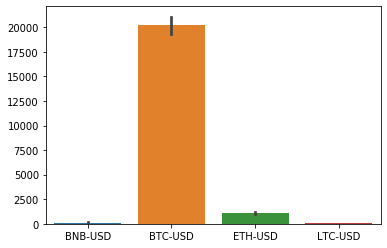

In [ ]:
#Barplot - shows the mean prices of the the dataset.
sns.barplot(data=df)
plt.show()

Expolore BTC-USD

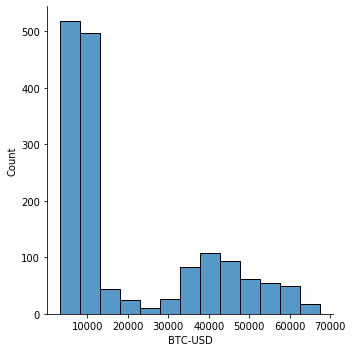

In [ ]:
#bitcoin displot - shows the distribution of a univarient set of observations. That is, single variable distribution
sns.displot(df['BTC-USD'])

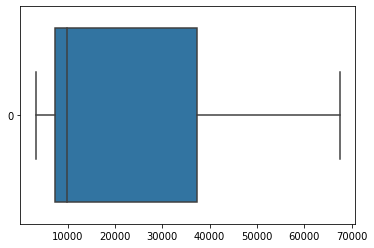

In [ ]:
#bitcoin boxplot - shows the quartiles
sns.boxplot(data=df['BTC-USD'], orient="h")

Expolore ETH-USD

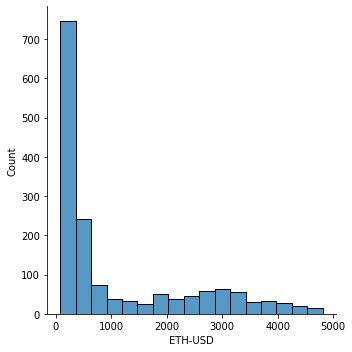

In [ ]:
##Ethereum displot - shows the distribution of a univarient set of observations. That is, single variable distribution
sns.displot(df['ETH-USD'])

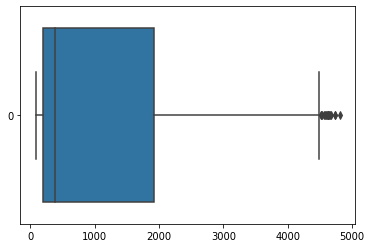

In [ ]:
#Ethereum boxplot - shows the quartiles
sns.boxplot(data=df['ETH-USD'], orient="h")

## Step 4 - Analysis based on returns

The crypto returns were also calculated.

Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. 

Percentage change = $\frac {P_{2}−P_{1}} {P_{1}} \times 100$

However, the .pct_change() function calculates only the change in price ie $\frac {P_{2}−P_{1}} {P_{1}}$.   
To get the actual percentage, the values should be multiplied by 100.

In [ ]:
#Calculate crypto returns
df_returns = df[crypto].pct_change() * 100
df_returns.head()

,BTC-USD,ETH-USD,LTC-USD,BNB-USD
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,9.701106,14.470236,11.636315,5.028879
2018-01-03,1.461080,8.850306,-4.034671,7.899160
2018-01-04,2.619566,1.890688,-1.629390,-3.375565
2018-01-05,11.733293,1.712468,3.273398,61.897286


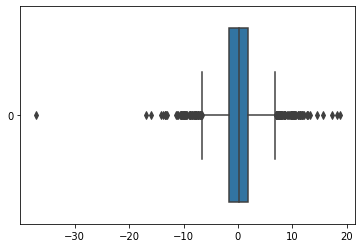

In [ ]:
#BTC-returns boxplot - shows the quartiles of bitcoin returns. The points outside the whiskers are determined to be outliers.
sns.boxplot(data=df_returns['BTC-USD'], orient="h")

In [ ]:
#Kurtosis - confirms high outliers in the data
df_returns.kurt()

BTC-USD     7.405125
ETH-USD     5.594947
LTC-USD     5.776818
BNB-USD    24.139741
dtype: float64

In [ ]:
#skewness - confirms skewed data
df_returns.skew()

BTC-USD   -0.368752
ETH-USD   -0.346108
LTC-USD    0.095406
BNB-USD    1.982670
dtype: float64

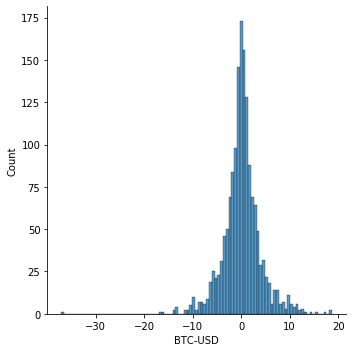

In [ ]:
#BTC-returns distplot - shows the distribution of a univarient set of observations. That is, single variable distribution.
sns.displot(df_returns['BTC-USD'])

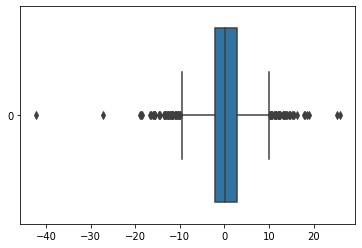

In [ ]:
#ETH-returns boxplot - shows the quartiles of bitcoin returns. The points outside the whiskers are determined to be outliers.
sns.boxplot(data=df_returns['ETH-USD'], orient="h")

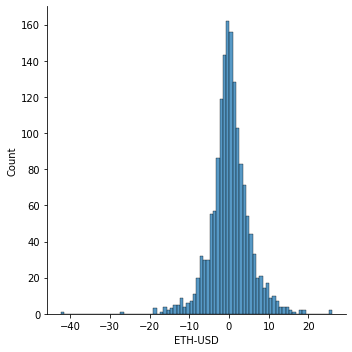

In [ ]:
#ETH-returns distplot - shows the distribution of a univarient set of observations. That is, single variable distribution
sns.displot(df_returns['ETH-USD'])

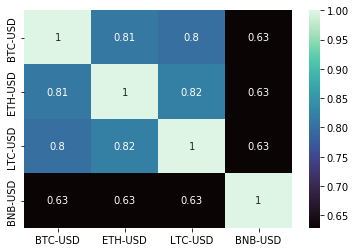

In [ ]:
#heatmap - correlation heatmap shows a 2D correlation matrix between two discrete dimensions.
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_returns.corr(), annot=True,cmap= cmap)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


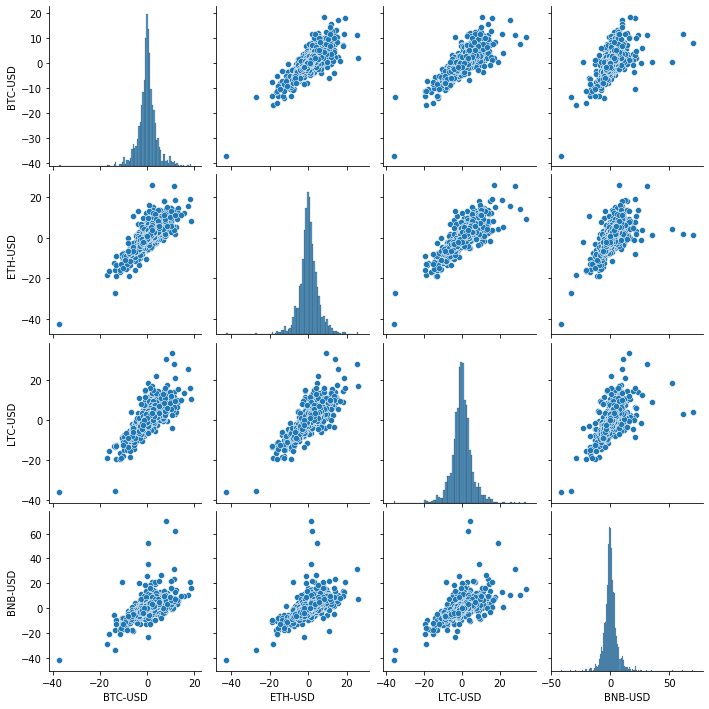

In [ ]:
# pairplot - shows a pairwise relationships in the dataset.
sns.pairplot(df_returns, size = 2.5)

### Calculate Cummulative returns

In [ ]:
returns = df.pct_change()
returns.head()

,BNB-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,0.050289,0.097011,0.144702,0.116363
2018-01-03,0.078992,0.014611,0.088503,-0.040347
2018-01-04,-0.033756,0.026196,0.018907,-0.016294
2018-01-05,0.618973,0.117333,0.017125,0.032734


In [ ]:
#Calculate monthly cummulative returns
m_cumm_returns = returns.resample('M').agg(lambda x: (x+1).prod() -1)
m_cumm_returns = m_cumm_returns * 100
m_cumm_returns = m_cumm_returns.reset_index()
m_cumm_returns['Year'] = m_cumm_returns['Date'].dt.year
m_cumm_returns['Month'] = m_cumm_returns['Date'].dt.month_name()
m_cumm_returns.head()

,Date,BNB-USD,BTC-USD,ETH-USD,LTC-USD,Year,Month
0,2018-01-31,32.448213,-25.159627,44.738639,-28.677966,2018,January
1,2018-02-28,-6.341861,1.729763,-23.527561,24.207998,2018,February
2,2018-03-31,5.917683,-32.933289,-53.641549,-42.528401,2018,March
3,2018-04-30,29.452156,32.508931,68.977723,27.331123,2018,April
4,2018-05-31,-0.851731,-18.899091,-13.774546,-20.476576,2018,May


Text(0, 0.5, 'Percentage returns of Bitcoin')

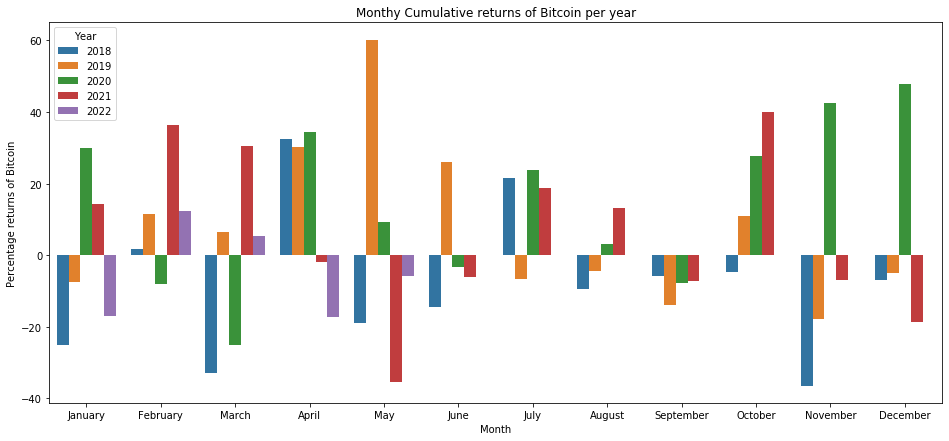

In [ ]:
#Visualize monthly cummulative returns of Bitcoin per year
plt.figure(figsize=(16,7))
sns.barplot(x='Month', y='BTC-USD', data=m_cumm_returns, hue='Year') 
plt.title('Monthy Cumulative returns of Bitcoin per year')     
plt.ylabel('Percentage returns of Bitcoin')     



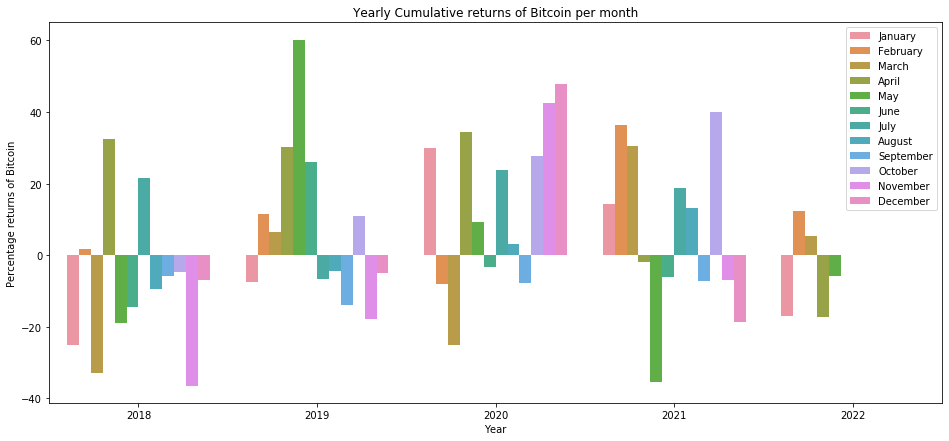

In [ ]:
#Visualize yearly cummulative returns of Bitcoin per month
plt.figure(figsize=(16,7))
sns.barplot(x='Year', y='BTC-USD', data=m_cumm_returns, hue='Month') 
plt.title('Yearly Cumulative returns of Bitcoin per month')     
plt.ylabel('Percentage returns of Bitcoin') 
plt.legend(loc='upper right')



Text(0, 0.5, 'Percentage returns of Bitcoin')

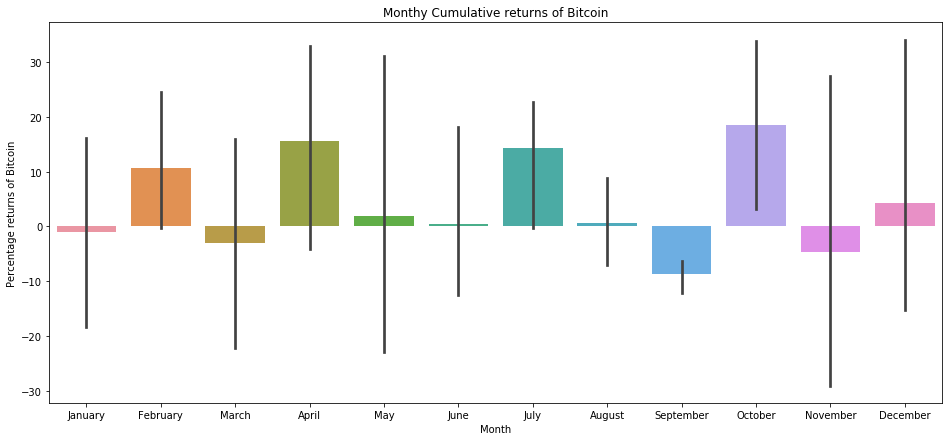

In [ ]:
#Visualize monthly cummulative returns of Bitcoin 
plt.figure(figsize=(16,7))
sns.barplot(x='Month', y='BTC-USD', data=m_cumm_returns) 
plt.title('Monthy Cumulative returns of Bitcoin')     
plt.ylabel('Percentage returns of Bitcoin')     

Text(0, 0.5, 'Percentage returns of Ethereum')

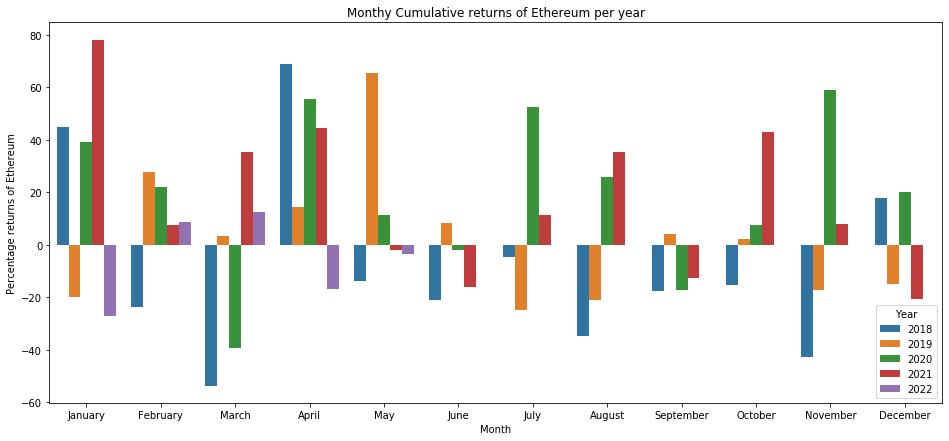

In [ ]:
#Visualize monthly cummulative returns of Ethereum per year
plt.figure(figsize=(16,7))
sns.barplot(x='Month', y='ETH-USD', data=m_cumm_returns, hue='Year') 
plt.title('Monthy Cumulative returns of Ethereum')     
plt.title('Monthy Cumulative returns of Ethereum per year')     
plt.ylabel('Percentage returns of Ethereum')   

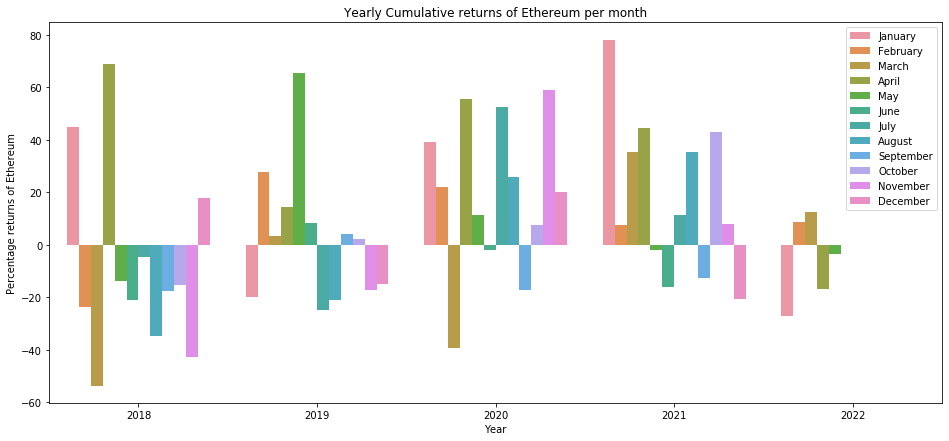

In [ ]:
#Visualize yearly cummulative returns of Ethereum per month
plt.figure(figsize=(16,7))
sns.barplot(x='Year', y='ETH-USD', data=m_cumm_returns, hue='Month') 
plt.title('Yearly Cumulative returns of Ethereum per month')     
plt.ylabel('Percentage returns of Ethereum') 
plt.legend(loc='upper right')

